# Exercise - Hand-written digits

One of the important problems in computer vision is Optical Character Recognition (OCR) - extraction of printed or handwritten text from images. We can extract text from images, such as photos of license plates or containers with serial numbers, as well as from documents - invoices, bills, financial reports, articles, and more. In this exercise, we will take a look at identification of hand-written digits. In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits,
which is built into the library.

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions. (<a href="https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits">Link to dataset</a>)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. First, let's visualize the first image - which shows as an 8 x 8 grid of pixels.

<Figure size 432x288 with 0 Axes>

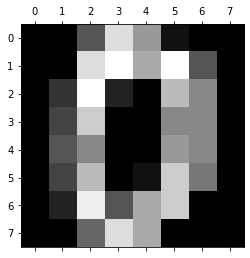

In [6]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

Let's visualize the first hundred of these:

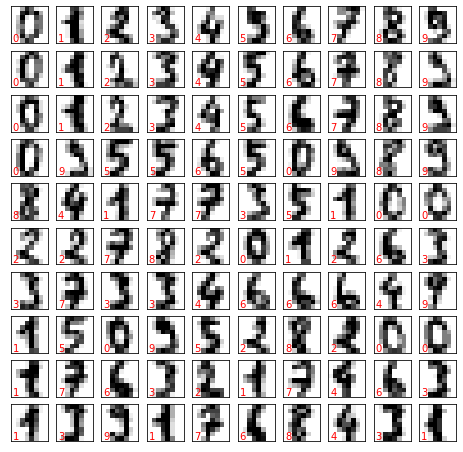

In [7]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary")
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes,color='red')

In order to work with this data within Scikit-Learn, we need a two-dimensional, [n_samples, n_features] representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes, respectively:

In [8]:
X = digits.data
X.shape

(1797, 64)

In [9]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features

## Train Test Split

Let's split up the data into a training set and a test set!

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

## Model Creation

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion="entropy", n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [12]:
ypred = model.predict(X_test)

## Evaluation

In [13]:
from sklearn import metrics

In [14]:
print(metrics.confusion_matrix(y_test,ypred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  1 43  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  1  0  0 45  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


In [16]:
print(metrics.classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      0.98      0.97        43
           2       1.00      0.98      0.99        44
           3       0.96      0.98      0.97        45
           4       1.00      0.97      0.99        38
           5       0.94      0.98      0.96        48
           6       1.00      1.00      1.00        52
           7       0.98      1.00      0.99        48
           8       0.98      0.94      0.96        48
           9       0.98      0.96      0.97        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

